<a href="https://colab.research.google.com/github/AgboolaMubarak/House-Price-Prediction-In-Nigeria/blob/main/Predicting_the_Prices_of_Houses_in_Nigeria_Using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install grpcio==1.24.3
!pip install tensorflow==2.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 56.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for grpcio
  Running setup.py clean for grpcio
Failed to build grpcio
ERROR: Could not build wheels for grpcio, which is required to install pyproject.toml-based projects
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 88.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [34]:
#import neccesary libraries
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
np.set_printoptions(precision=3, suppress=True)


In [5]:
#import neccesary libraries
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.9.0


In [152]:
#read train and test dataset
train = pd.read_csv("Housing_dataset_train.csv")
test = pd.read_csv("Housing_dataset_test.csv")

In [100]:
#check first 3 rows of train dataset
train.head(3)

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814


In [101]:
#check first 3 rows of test dataset
test.head(3)

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2


In [102]:
#check details of the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [103]:
#check details of the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             6000 non-null   int64 
 1   loc            6000 non-null   object
 2   title          6000 non-null   object
 3   bedroom        6000 non-null   int64 
 4   bathroom       6000 non-null   int64 
 5   parking_space  6000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 281.4+ KB


In [104]:
#check descriptive statistics of the train dataset
train.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [105]:
#check descriptive statistics of the test dataset
test.describe()

,ID,bedroom,bathroom,parking_space
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,4818.699167,4.329833,3.105667,3.132333
std,3832.336902,2.454733,2.033189,1.604551
min,2.000000,1.000000,1.000000,1.000000
25%,1647.000000,2.000000,1.000000,2.000000
50%,3433.000000,4.000000,2.000000,3.000000
75%,7970.000000,6.000000,5.000000,4.000000
max,12995.000000,9.000000,7.000000,6.000000


In [106]:
#check number of missing values in the each of columns in the train dataset
train.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

## **Clean the Data**

In [153]:
#drop missing values int title column
train.dropna(subset=['title'], inplace=True)

In [108]:
#check number of missing values in the each of columns in the train dataset
train.isnull().sum()

ID                  0
loc              1747
title               0
bedroom          1726
bathroom         1739
parking_space    1736
price               0
dtype: int64

In [154]:
#fill location, bedroom, bathroom and parkspace with mode and median

# Fill missing values in the 'location' column with the mode
print(train['loc'].mode()[0])
train['loc'].fillna(train['loc'].mode()[0], inplace=True)

# Fill missing values in the 'bedroom' column with the median
print(train['bedroom'].median())
train['bedroom'].fillna(train['bedroom'].median(), inplace=True)

# Fill missing values in the 'bathroom' column with the median
print(train['bathroom'].median())
train['bathroom'].fillna(train['bathroom'].median(), inplace=True)

# Fill missing values in the 'bedroom' column with the median
print(train['parking_space'].median())
train['parking_space'].fillna(train['parking_space'].median(), inplace=True)

Cross River
4.0
2.0
3.0


In [155]:
#check number of missing values in the each of columns in the train dataset
train.isnull().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

## **Data Visualization and Analysis**

In [111]:
#a function that plots a scattered plot given parameters
def plot_scatter(x, y, title,xlabel, ylabel):
  plt.figure(figsize=(10, 6))
  plt.scatter(x, y, alpha=0.5)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.grid(True)
  plt.show()

In [112]:
#chceck unique values and their count in the title column
print(train["title"].nunique())
train["title"].value_counts()

10


Flat                    1372
Apartment               1331
Townhouse               1327
Mansion                 1322
Detached duplex         1312
Penthouse               1306
Semi-detached duplex    1299
Bungalow                1293
Terrace duplex          1266
Cottage                  450
Name: title, dtype: int64

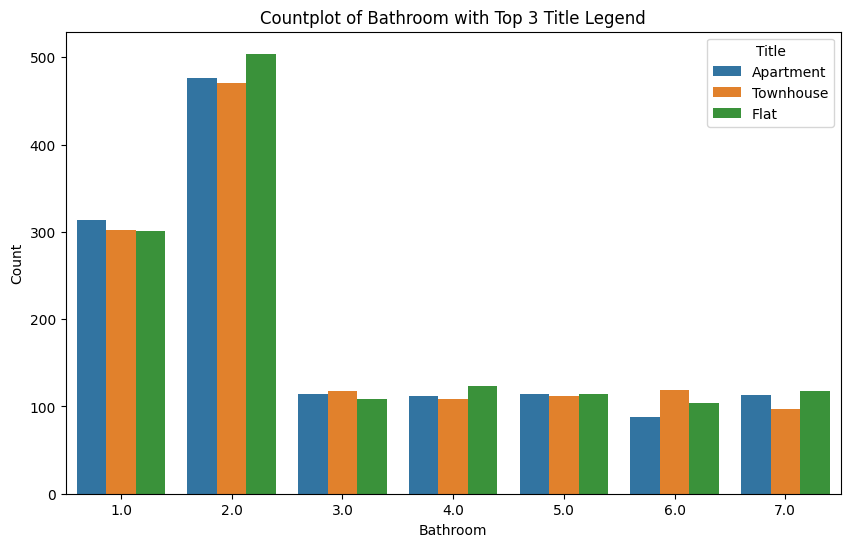

In [113]:
#create a countplot for the "bathroom" column with the top 3 house type as aa legend
# Find the top 3 most frequent titles
top_titles = train['title'].value_counts().head(3).index

# Filter the DataFrame to include only the top titles
filtered_train = train[train['title'].isin(top_titles)]

# Create a countplot with the legend as the top titles
plt.figure(figsize=(10, 6))
sns.countplot(x='bathroom', hue='title', data=filtered_train)
plt.title('Countplot of Bathroom with Top 3 Title Legend')
plt.xlabel('Bathroom')
plt.ylabel('Count')
plt.legend(title='Title')
plt.show()

Observation: In the dataset, there is a substantial presence of properties, including flats, townhouses, and apartments, with two bathrooms




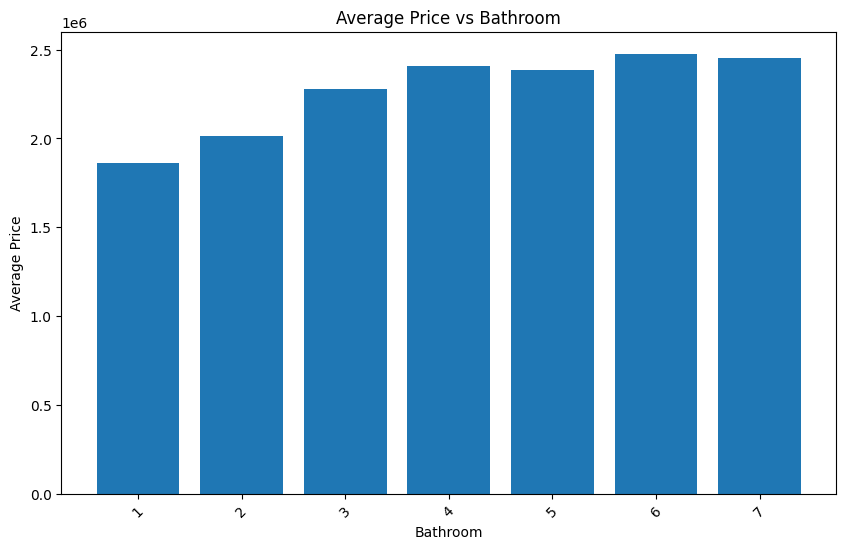

In [114]:
# Group by 'bathroom' and calculate the average price for each group
average_price_by_bathroom = train.groupby('bathroom')['price'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_price_by_bathroom['bathroom'], average_price_by_bathroom['price'])
plt.title('Average Price vs Bathroom')
plt.xlabel('Bathroom')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

Observation: It's logical that as the number of bathrooms increases, the average house prices also tend to rise.

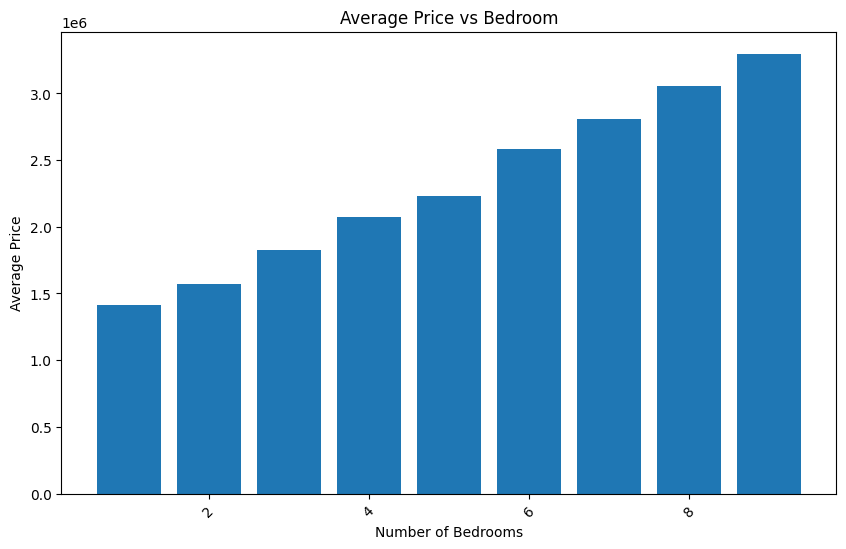

In [115]:
# Group by 'bedroom' and calculate the average price for each group
average_price_by_bedroom = train.groupby('bedroom')['price'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_price_by_bedroom['bedroom'], average_price_by_bedroom['price'])
plt.title('Average Price vs Bedroom')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

Observation: It's also logical that as the number of bedrooms increases, the average house prices also tend to rise.

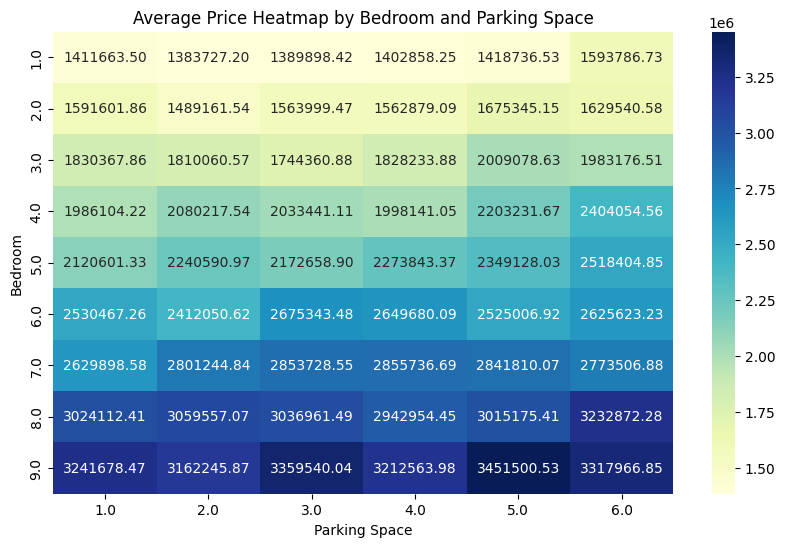

In [116]:
# Create a pivot table with 'bedroom' and 'parking_space' as rows and columns
pivot_table = train.pivot_table(index='bedroom', columns='parking_space', values='price', aggfunc='mean')

# Create a heatmap plot
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Average Price Heatmap by Bedroom and Parking Space')
plt.xlabel('Parking Space')
plt.ylabel('Bedroom')
plt.show()

Observation : As the number of bedrooms and parking spaces increases, the price tends to rise accordingly.

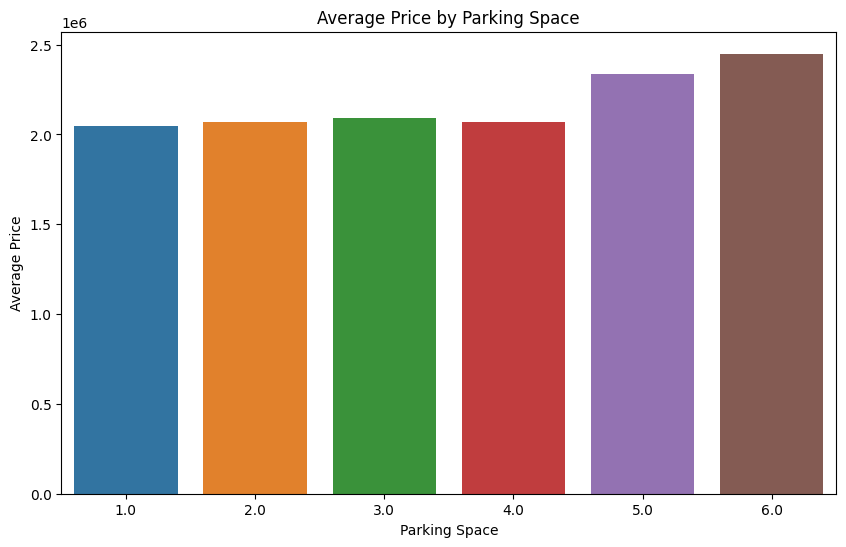

In [117]:
#average price vs number of parking space
plt.figure(figsize=(10, 6))
sns.barplot(x='parking_space', y='price', data=train, errorbar=None)
plt.title('Average Price by Parking Space')
plt.xlabel('Parking Space')
plt.ylabel('Average Price')
plt.show()

Observation : As the number of parking spaces increases, the price tends to rise accordingly.

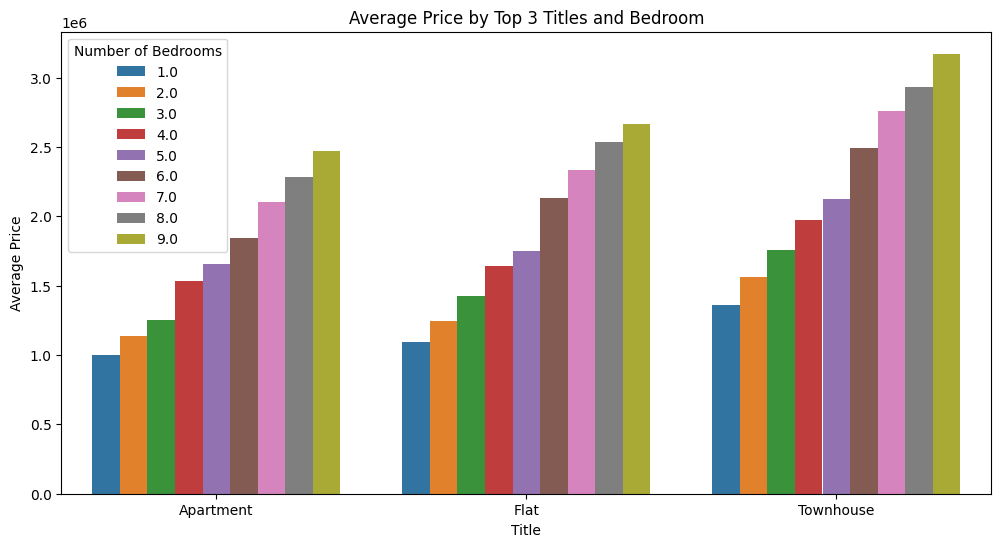

In [118]:
# Filter the DataFrame to include only the top titles
filtered_train = train[train['title'].isin(top_titles)]

# Group by 'title' and 'bedroom' and calculate the average price for each group
average_price_by_combination = filtered_train.groupby(['title', 'bedroom'])['price'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=average_price_by_combination, x='title', y='price', hue='bedroom')
plt.title('Average Price by Top 3 Titles and Bedroom')
plt.xlabel('Title')
plt.ylabel('Average Price')
plt.legend(title='Number of Bedrooms', loc='upper left')
plt.show()

Observation: as number of bedroom increase each house category, the prices increase

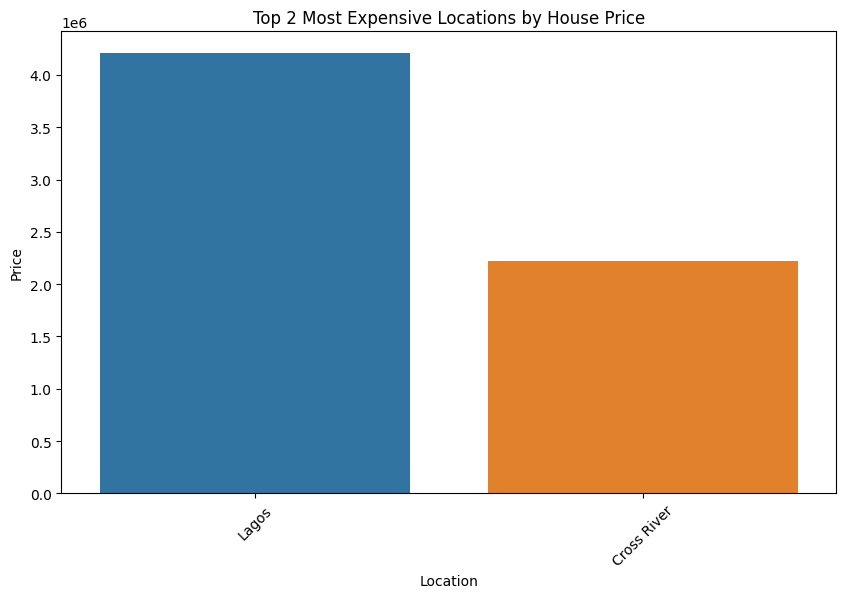

In [119]:
#find the locations where we have expensive houses
# Sort the data by price in descending order
sorted_train = train.sort_values(by='price', ascending=False)

# Select the top 3 most expensive locations
top_expensive_locations = sorted_train['loc'].head(3)

# Filter the DataFrame to include only the top expensive locations
filtered_train = sorted_train[sorted_train['loc'].isin(top_expensive_locations)]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='loc', y='price', data=filtered_train, errorbar=None)
plt.title('Top 2 Most Expensive Locations by House Price')
plt.xlabel('Location')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

Observation: Lagos and Cross-River have the most expensive houses in the dataset

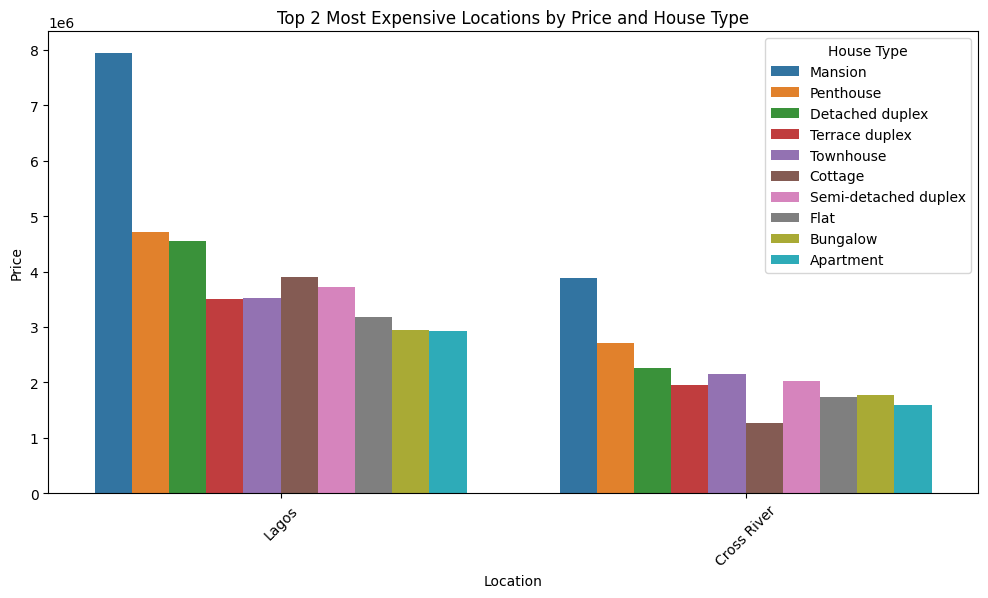

In [120]:
#check the type of house that are expensive
# Create a bar plot with hue based on 'title' column
plt.figure(figsize=(12, 6))
sns.barplot(x='loc', y='price', hue='title', data=filtered_train, errorbar=None)
plt.title('Top 2 Most Expensive Locations by Price and House Type')
plt.xlabel('Location')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='House Type', loc='upper right')
plt.show()

Observation: Mansions, Penthouses and Detached duplex are the most expensive houses in this locations

this is to check if the unique values in the train data and the test data match to avoid any error

In [121]:
# Extract unique values from the 'location' column in both datasets
unique_locations_train = set(train['loc'].unique())
unique_locations_test = set(test['loc'].unique())

# Extract unique values from the 'title' (house type) column in both datasets
unique_titles_train = set(train['title'].unique())
unique_titles_test = set(test['title'].unique())

# Check if unique values match between training and test data
location_match = unique_locations_train == unique_locations_test
title_match = unique_titles_train == unique_titles_test

# Print the results
print(f'Location values match: {location_match}')
print(f'Title (house type) values match: {title_match}')

Location values match: True
Title (house type) values match: True


## **Data Preprocessing**

i will use mean encoding to convert the location and title into numerical values based on the mean of the target variable

In [156]:
# Calculate the mean price for each unique value in the 'location' column
location_mean_encoding = train.groupby('loc')['price'].mean().reset_index()
location_mean_encoding = location_mean_encoding.rename(columns={'price': 'location_encoded'})

# Calculate the mean price for each unique value in the 'title' column (house type)
title_mean_encoding = train.groupby('title')['price'].mean().reset_index()
title_mean_encoding = title_mean_encoding.rename(columns={'price': 'title_encoded'})

# Merge the mean encodings back into the original DataFrame
train = train.merge(location_mean_encoding, on='loc', how='left')
train = train.merge(title_mean_encoding, on='title', how='left')

# Drop the original 'location' and 'title' columns
train = train.drop(['loc', 'title',"ID"], axis=1)


In [158]:
#check effect
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12278 entries, 0 to 12277
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedroom           12278 non-null  float64
 1   bathroom          12278 non-null  float64
 2   parking_space     12278 non-null  float64
 3   price             12278 non-null  float64
 4   location_encoded  12278 non-null  float64
 5   title_encoded     12278 non-null  float64
dtypes: float64(6)
memory usage: 671.5 KB


apply the same to the test data

In [159]:
# Merge the mean encoding values from training data into the test data
test = test.merge(location_mean_encoding, on='loc', how='left')
test = test.merge(title_mean_encoding, on='title', how='left')

# Drop the original 'location' and 'title' columns
test = test.drop(['loc', 'title'], axis=1)

In [160]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                6000 non-null   int64  
 1   bedroom           6000 non-null   int64  
 2   bathroom          6000 non-null   int64  
 3   parking_space     6000 non-null   int64  
 4   location_encoded  6000 non-null   float64
 5   title_encoded     6000 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 328.1 KB


In [161]:
#copy the data
train_features = train.copy()
test_features = test.copy()

In [162]:
test_features.drop("ID",axis=1,inplace=True)

In [163]:
train_labels = train_features.pop('price')

In [164]:
train_labels = np.log1p(train_labels)

Normalization

In [165]:
#create the layer
normalizer = tf.keras.layers.Normalization(axis=-1)

In [166]:
#fit the state of the preprocessing layer to the data
normalizer.adapt(np.array(train_features))

In [167]:
#Calculate the mean and variance, and store them in the layer
print(normalizer.mean.numpy())

[[      4.259       2.972       3.146 2133243.5   2133244.   ]]


## **Modelling**

Using multiple Inputs for DNN

In [201]:
#Regression using a DNN
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


In [202]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 5)                11        
 ion)                                                            
                                                                 
 dense_13 (Dense)            (None, 64)                384       
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 32)                1056      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                      

In [203]:
#train with 100 epochs
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 1min 53s, sys: 5.51 s, total: 1min 58s
Wall time: 1min 41s


In [204]:
#Visualize the model's training progress using the stats stored in the history object
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.116934,0.118970,95
96,0.121510,0.111276,96
97,0.118910,0.117618,97
98,0.118108,0.185193,98
99,0.117656,0.113360,99


In [205]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [price]')
  plt.legend()
  plt.grid(True)

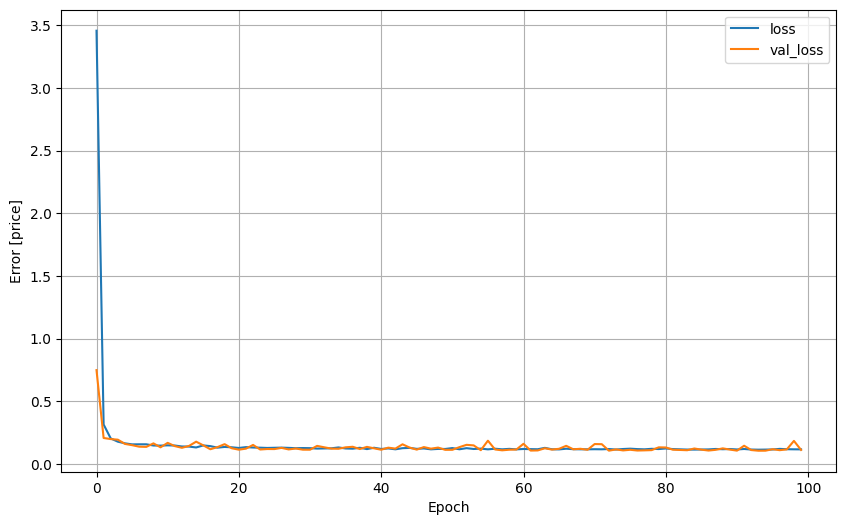

In [206]:
plot_loss(history)

In [207]:
#fit the state of the preprocessing layer to the test data
normalizer.adapt(np.array(test_features))

In [208]:
prediction = dnn_model.predict(test_features)

188/188 [==============================] - 0s 1ms/step


In [209]:
sub = pd.DataFrame()
sub["Id"] = test.ID
sub["price"] = np.exp(prediction)
sub.to_csv("pr4.csv", index=False)